In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
batch_size = 25
img_height, img_width = 256, 256
input_shape = (img_height, img_width, 3)


def create_data_sparse():
    # data_gen = ImageDataGenerator(horizontal_flip=True, rotation_range=20, width_shift_range=0.2,
    #                               height_shift_range=0.2, zoom_range=0.2)
    data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

    train_images = data_gen.flow_from_directory('Dataset/PandasBears/Train', 
                                                target_size=(img_height, img_width),
                                                class_mode='binary', 
                                                batch_size=batch_size, 
                                                subset='training', 
                                                # color_mode='rgb'
                                                )
    
    
    test_images = data_gen.flow_from_directory('Dataset/PandasBears/Test', 
                                               target_size=(img_height, img_width),
                                               class_mode='binary', 
                                               batch_size=batch_size, 
                                               shuffle=False, 
                                            #    color_mode='rgb'
                                               )

    return train_images, test_images

train_images, test_images = create_data_sparse()

labels = ['bear', 'panda']
# print(train_images)


Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


(256, 256, 3)


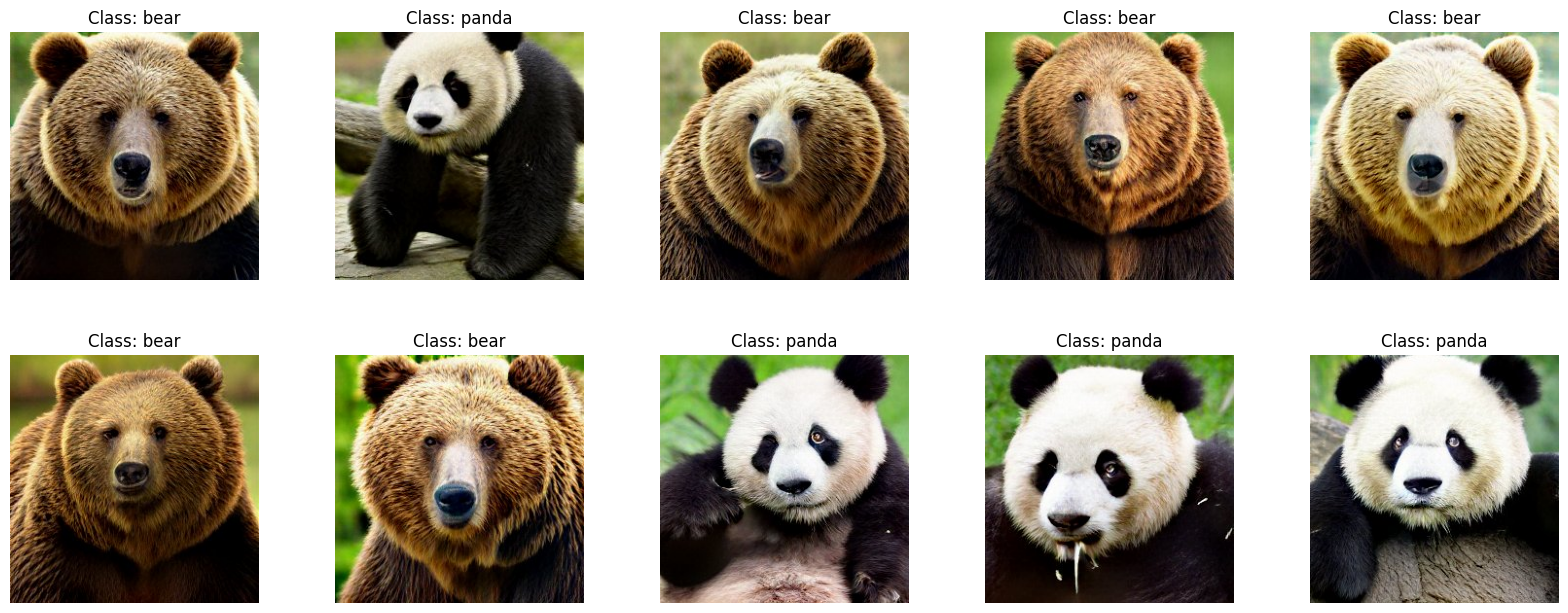

In [34]:

samples = next(train_images)
# print(samples[0]);

images = samples[0]
target = samples[1]
print(images[0].shape)
plt.figure(figsize = (20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[int(target[i])]}")
    plt.axis('off')


In [43]:
import numpy as np
import Convolution

input_size = (32, 32, 3)
# print(input_size[2])
input_data = np.random.randn(*input_size)

filter = [np.random.randn(*input_size) for _ in range(3)]

print(filter)
# images[0].shape[2]
# padding_size=1
# if padding_size > 0:
#     print("masuk")
#     padded_input = np.pad(input_data, ((padding_size, padding_size), (padding_size, padding_size), (0, 0)), mode='constant')
# else:
#     padded_input = input_data

# print(padded_input )
# # print('--')
# # print(input_data[0])

[array([[[ 6.07087797e-01,  1.31830140e+00, -2.17660942e+00],
        [-5.60006274e-01,  9.02428976e-01, -7.05734628e-01],
        [-8.62621889e-01, -5.88355138e-02, -4.94827751e-01],
        ...,
        [ 1.18152859e+00, -1.27319170e+00, -1.51384386e-01],
        [ 3.91866467e-01, -6.91769365e-01, -1.13461612e+00],
        [-5.91402933e-01,  6.53499707e-01, -1.42480945e+00]],

       [[-1.99574886e-01,  1.17748199e+00,  1.56720908e+00],
        [-1.49343074e-01,  3.38845382e-01, -1.23289993e+00],
        [ 2.07335941e+00,  5.56921105e-02,  1.05529416e+00],
        ...,
        [-6.82491338e-02, -1.49701588e-01,  4.36135196e-02],
        [-4.11646072e-01, -9.79698419e-01, -7.94265539e-01],
        [-1.35213506e+00, -2.82076692e-01, -6.50315005e-01]],

       [[-7.26272667e-01,  2.61644548e-01, -1.41714462e+00],
        [ 8.37580077e-01,  3.12297179e+00, -6.10547288e-01],
        [ 4.36417767e-01, -1.19370456e+00, -1.01304777e+00],
        ...,
        [-2.72167394e-02,  4.50963123e-01

In [3]:
import numpy as np

class Convolution:
    
    # TODO: diferent width / height
    def __init__(self, input_size, padding_size, filter_size, num_filters, stride, biases):
        self.input_size = input_size
        self.padding_size = padding_size
        self.filter_size = filter_size

        self.num_filters = num_filters
        self.stride = stride
        self.biases = biases

        self.output_size = (((input_size[0] - filter_size[0] + 2 * padding_size) // stride ) + 1, ((input_size[1] - filter_size[1] + 2 * padding_size) // stride ) + 1)


    def convolution(self, input):

        # init random filter
        self.filter = [np.random.randn(self.filter_size[0], self.filter_size[1], input.shape[2]) for _ in range(self.num_filters)]

        # Menambahkan padding jika diperlukan
        if self.padding_size > 0:
            padded_input = np.pad(input, ((self.padding_size, self.padding_size), (self.padding_size, self.padding_size), (0, 0)), mode='constant')
        else:
            padded_input = input

        # init input
        self.output = np.zeros((self.output_size[0], self.output_size[1], self.num_filters))

        for i in range(0,self.input_size[0] - self.filter_size[0] + (2 * self.padding_size) + 1, self.stride):
            for j in range(0, self.input_size[1] - self.filter_size[1] + (2 * self.padding_size) + 1,self.stride):
                for n in range(self.num_filters):
                    # Mengambil bagian input yang sesuai dengan ukuran filter
                    input_patch = padded_input[i:i+self.filter_size[0], j:j+self.filter_size[1]]
                    # Melakukan operasi konvolusi
                    self.output[i//self.stride][j//self.stride][n] = np.sum(input_patch * self.filter[n])

        return self.output

    def detector(self, input):
        return np.maximum(0, input)
    
    def polling(self, input, filter_size, stride, mode):
        input_size = input.shape
        output_size = (((input_size[0] - filter_size[0] ) // stride ) + 1, ((input_size[1] - filter_size[1]) // stride ) + 1)
        output = np.zeros((output_size[0], output_size[1],input_size[2]))
        for i in range(0,input_size[0] - filter_size[0] +1, stride):
            for j in range(0, input_size[1] - filter_size[1] +1 ,stride):
                for n in range(input_size[2]):
                    input_patch = input[i:i+filter_size[0], j:j+filter_size[1], n]
                    if mode == "max":
                        # Max pooling
                        output[i//stride][j//stride][n] = np.max(input_patch)
                    elif mode == "average":
                        # Average pooling
                        output[i//stride][j//stride][n] = np.mean(input_patch)
        return output



In [59]:
class Detector:
    def forward(self, input_data):
        # Apply ReLU activation function
        return np.maximum(0, input_data)

In [63]:
import numpy as np
input_size = (4, 4, 1)
input_data = np.random.randn(*input_size)

# input_data =np.array(
#     [[[252], [251], [246], [207], [90]],
#     [[250], [242], [236], [144], [41]],
#     [[252], [244], [228], [102], [43]],
#     [[250], [243], [214], [59], [52]],
#     [[248], [243], [201], [44], [54]],]
# )

conv_layer = Convolution(input_size=(4, 4), padding_size=1, filter_size=(3, 3), num_filters=1, stride=1, biases=0)

output = conv_layer.convolution(input_data)
# print(output)
print(output.shape)
print("----")

output = conv_layer.detector(output)
print(output)
print("----")

output = conv_layer.polling(output, (2,2), 2, 'max')
print(output)

(4, 4, 1)
----
[[[0.        ]
  [0.        ]
  [1.54005087]
  [0.73818044]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [1.16298064]]

 [[0.27522766]
  [1.8549523 ]
  [0.        ]
  [1.33954165]]

 [[0.        ]
  [0.54027686]
  [0.        ]
  [1.30584203]]]
----
[[[0.        ]
  [1.54005087]]

 [[1.8549523 ]
  [1.33954165]]]


In [77]:
class FlattenLayer:
    def __init__(self):
        pass

    def forward(self, input_data):
        # Mendapatkan ukuran input
        input_shape = input_data.shape

        # Melakukan flatten, mengubah tensor tiga dimensi menjadi tensor dua dimensi
        output_data = input_data.reshape((input_shape[0], -1))

        return output_data

In [66]:
input_data = np.random.randn(2, 2, 3)  # Example input data with shape (2, 3, 4)

    # Create Flatten Layer
flatten_layer = FlattenLayer()

# Apply Flatten Layer
flattened_output = flatten_layer.forward(input_data)

# Print the results
print(input_data)
print("Input Data Shape:", input_data.shape)
print("Flattened Output Shape:", flattened_output.shape)
print( flattened_output)

[[[ 0.11727288  0.10071471 -0.38097867]
  [ 0.23254367  2.17509359 -1.49599756]]

 [[ 1.54857333 -1.24913605 -0.46294181]
  [-0.61453031  0.30567857  0.07647074]]]
Input Data Shape: (2, 2, 3)
Flattened Output Shape: (2, 6)
[[ 0.11727288  0.10071471 -0.38097867  0.23254367  2.17509359 -1.49599756]
 [ 1.54857333 -1.24913605 -0.46294181 -0.61453031  0.30567857  0.07647074]]


In [10]:
import numpy as np
import tensorflow as tf

# Membuat data input acak
input_data = np.random.randn(2, 3, 3)  # Contoh input data dengan bentuk (2, 3, 4)

# Membuat Flatten Layer menggunakan NumPy


# Menggunakan Flatten Layer dengan NumPy
# flatten_layer = FlattenLayer()

# Apply Flatten Layer
# flattened_output = flatten_layer.forward(input_data)

# Membuat model dengan Flatten Layer menggunakan TensorFlow
model = tf.keras.Sequential([
    
    
    .keras.layers.Flatten(input_shape=(3, 3)),  # Sesuaikan input shape dengan input_data
])

# Menggunakan Flatten Layer dengan TensorFlow
flattened_output_tf = model.predict(input_data)
print(flattened_output_tf)
# print("----")
# print(flattened_output  )

1/1 [==============================] - 0s 138ms/step
[[-1.0157087   2.044035   -0.88603735  1.5479356   0.91290134 -1.9528053
  -0.64105916  0.10472514 -0.1058268 ]
 [ 0.24500819  1.607279   -1.6582738   1.2988135   0.5754737   0.31702325
   0.6613857  -1.4841888   1.3616279 ]]


In [4]:
class DenseLayer:
    def __init__(self, input_size, num_units, activation_function):
        self.input_size = input_size
        self.num_units = num_units
        self.activation_function = activation_function

        # Initialize weights and biases with random values
        self.weights = np.random.randn(input_size, num_units)
        self.biases = np.zeros(num_units)

    def forward(self, input_data):
        # Perform matrix multiplication (input_data * weights) and add biases
        pre_activation = np.dot(input_data, self.weights) + self.biases

        # Apply activation function based on the chosen mode
        if self.activation_function == "relu":
            output_data = self.relu(pre_activation)
        elif self.activation_function == "sigmoid":
            output_data = self.sigmoid(pre_activation)
        else:
            raise ValueError("Invalid activation function. Choose 'relu' or 'sigmoid'.")

        return output_data

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [4]:
for i, (batch_x, batch_y) in enumerate(train_images):
    # Tampilkan 5 contoh gambar dari batch pertama
    if i == 1:
        break
    
    print(len(batch_x))
    # batch_x adalah batch gambar, batch_y adalah batch label
    print(f"Batch {i + 1} - Labels: {batch_y}")

25
Batch 1 - Labels: [0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 0.]


In [75]:
input_size = 5
num_units = 3

# Create input data (random values for simplicity)
input_data = np.random.randn(2, input_size)

# Create Dense Layer with ReLU activation
dense_layer_relu = DenseLayer(input_size=input_size, num_units=num_units, activation_function="relu")

# Apply Dense Layer with ReLU activation
relu_output = dense_layer_relu.forward(input_data)

# Create Dense Layer with Sigmoid activation
dense_layer_sigmoid = DenseLayer(input_size=input_size, num_units=num_units, activation_function="sigmoid")

# Apply Dense Layer with Sigmoid activation
sigmoid_output = dense_layer_sigmoid.forward(input_data)

# Print the results
print("Input Data:")
print(input_data)
print("\nDense Layer Output (ReLU):")
print(relu_output)
print("\nDense Layer Output (Sigmoid):")
print(sigmoid_output)

Input Data:
[[ 0.12619558  0.23202117  1.64212108  1.12105477 -0.29429479]
 [ 2.4709185   0.81401086 -0.89714084 -0.67386349 -2.099108  ]]

Dense Layer Output (ReLU):
[[1.87322937 0.         0.        ]
 [0.43256235 0.         0.        ]]

Dense Layer Output (Sigmoid):
[[0.88341399 0.59623229 0.43621966]
 [0.71201905 0.38879994 0.97254908]]


In [16]:
# for i, (batch_x, batch_y) in enumerate(train_images):
#     # Tampilkan 5 contoh gambar dari batch pertama
#     if i == 1:
#         break
    
#     print(len(batch_x))
#     # batch_x adalah batch gambar, batch_y adalah batch label
#     print(f"Batch {i + 1} - Labels: {batch_y}")

for i, (batch_x, batch_y) in enumerate(train_images):
    print(len(batch_x))
    break

25


In [29]:
samples = next(train_images)
print(samples[0][0].shape);

(256, 256, 3)


In [36]:
import numpy as np

class Pooling:
    def __init__(self,  filter_size, stride, mode):
        self.filter_size = filter_size
        self.stride = stride
        self.mode = mode

    def forward(self, input):
        input_size = input.shape
        output_size = (((input_size[0] - self.filter_size[0] ) // self.stride ) + 1, ((input_size[1] - self.filter_size[1]) // self.stride ) + 1)
        output = np.zeros((output_size[0], output_size[1],input_size[2]))
        for i in range(0,input_size[0] - self.filter_size[0] +1, self.stride):
            for j in range(0, input_size[1] - self.filter_size[1] +1 ,self.stride):
                for n in range(input_size[2]):
                    input_patch = input[i:i+self.filter_size[0], j:j+self.filter_size[1], n]
                    if self.mode == "max":
                        # Max pooling
                        output[i//self.stride][j//self.stride][n] = np.max(input_patch)
                    elif self.mode == "average":
                        # Average pooling
                        output[i//self.stride][j//self.stride][n] = np.mean(input_patch)
        return output

In [37]:
import numpy as np

class Convolution:
    
    # TODO: diferent width / height
    def __init__(self, input_size, padding_size, filter_size, num_filters, stride, biases):
        self.input_size = input_size
        self.padding_size = padding_size
        self.filter_size = filter_size

        self.num_filters = num_filters
        self.stride = stride
        self.biases = biases

        self.output_size = (((input_size[0] - filter_size[0] + 2 * padding_size) // stride ) + 1, ((input_size[1] - filter_size[1] + 2 * padding_size) // stride ) + 1)
        # init random filter
        self.filter = [np.random.randn(self.filter_size[0], self.filter_size[1], input_size[2]) for _ in range(self.num_filters)]

    # include convolution and detector
    def forward(self, input):


        # Menambahkan padding jika diperlukan
        if self.padding_size > 0:
            padded_input = np.pad(input, ((self.padding_size, self.padding_size), (self.padding_size, self.padding_size), (0, 0)), mode='constant')
        else:
            padded_input = input

        # init input
        self.output = np.zeros((self.output_size[0], self.output_size[1], self.num_filters))

        for i in range(0,self.input_size[0] - self.filter_size[0] + (2 * self.padding_size) + 1, self.stride):
            for j in range(0, self.input_size[1] - self.filter_size[1] + (2 * self.padding_size) + 1,self.stride):
                for n in range(self.num_filters):
                    # Mengambil bagian input yang sesuai dengan ukuran filter
                    input_patch = padded_input[i:i+self.filter_size[0], j:j+self.filter_size[1]]
                    # Melakukan operasi konvolusi
                    self.output[i//self.stride][j//self.stride][n] = np.maximum(0,np.sum(input_patch * self.filter[n]))

        return self.output

In [38]:
class Flatten:
    def __init__(self):
        pass

    def forward(self, input_data):
        # Mendapatkan ukuran input
        input_shape = input_data.shape

        # Melakukan flatten, mengubah tensor tiga dimensi menjadi tensor dua dimensi
        output_data = input_data.flatten()

        return output_data

In [39]:
class DenseLayer:
    def __init__(self, input_size, num_units, activation_function):
        self.input_size = input_size
        self.num_units = num_units
        self.activation_function = activation_function

        # Initialize weights and biases with random values
        self.weights = np.random.randn(input_size, num_units)
        self.biases = np.zeros(num_units)

    def forward(self, input_data):
        # Perform matrix multiplication (input_data * weights) and add biases
        pre_activation = np.dot(input_data, self.weights) + self.biases

        # Apply activation function based on the chosen mode
        if self.activation_function == "relu":
            output_data = self.relu(pre_activation)
        elif self.activation_function == "sigmoid":
            output_data = self.sigmoid(pre_activation)
        else:
            raise ValueError("Invalid activation function. Choose 'relu' or 'sigmoid'.")

        return output_data

    def relu(self, x):
        return np.maximum(0, x)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
# input_size = 5
# num_units = 3

# # Create input data (random values for simplicity)
# input_data = np.random.randn(4, input_size)

# # Create Dense Layer with ReLU activation
# dense_layer_relu = DenseLayer(input_size=input_size, num_units=num_units, activation_function="relu")

# # Apply Dense Layer with ReLU activation
# relu_output = dense_layer_relu.forward(input_data)

# # Create Dense Layer with Sigmoid activation
# dense_layer_sigmoid = DenseLayer(input_size=input_size, num_units=num_units, activation_function="sigmoid")

# # Apply Dense Layer with Sigmoid activation
# sigmoid_output = dense_layer_sigmoid.forward(input_data)

# # Print the results
# print("Input Data:")
# print(input_data)
# print("\nDense Layer Output (ReLU):")
# print(relu_output)
# print("\nDense Layer Output (Sigmoid):")
# print(sigmoid_output)

In [40]:
samples = next(train_images)
input_shape = samples[0][0].shape
conv = Convolution(input_size=input_shape, padding_size=1, filter_size=(3, 3), num_filters=2, stride=1, biases=0)
pool = Pooling(filter_size = (32,32), stride=32, mode='max')
flat = Flatten()
dense_layer_relu = DenseLayer(input_size=128, num_units=7, activation_function="sigmoid")
dense_layer_sigmoid = DenseLayer(input_size=7, num_units=1, activation_function="relu")

In [49]:

pool_out =''
def train_network(train_data, conv, pool, full, lr=0.01, epochs=200):
    for epoch in range(epochs):
        total_loss = 0.0
        correct_predictions = 0
        num = 0

        # for i in range(1):
        # for i in range(len(train_data)):
        for i in range(len(train_data)):
            for j in range(len(train_data[i])):
                # # Forward pass    
                conv_out = conv.forward(train_data[i][0][j])
                pool_out = pool.forward(conv_out)
                flatten_output = flat.forward(pool_out)
                dense_relu_ouput = dense_layer_relu.forward(flatten_output)
                dense_sigmoid_output = dense_layer_sigmoid.forward(dense_relu_ouput)
                predictions = dense_sigmoid_output
                if (predictions>0.5):
                    predict = 1
                else :
                    predict = 0
                # Hitung prediksi
                if predict == train_data[i][1][j]:
                    correct_predictions += 1
                num +=1
            print(f"Batch {i}")
        accuracy = (correct_predictions / num) * 100.0
        print(f"Epoch {epoch + 1}/{epochs} - Accuracy: {accuracy:.2f}%")
    return accuracy

output =  train_network(train_images, conv, pool, '', lr=0.01, epochs=1)




KeyboardInterrupt: 

In [145]:
import numpy as np

# Define the threshold
threshold = 0.5

# Your original output values
output_values = np.array([[1.53832983e-01],
                          [2.12254281e-01],
                          # ... (other values)
                          [4.58956861e-01],
                          [4.75154031e-01]])

# Apply the threshold to create binary labels
binary_labels = (output_values >= threshold).astype(int)

# Print the binary labels
print(binary_labels)


[[0]
 [0]
 [0]
 [0]]


In [76]:
conv_out = conv.forward(samples[0][0])
pool_out = pool.forward(conv_out )
print(conv_out )

[[[0.         0.05949247]
  [0.         0.        ]
  [0.         0.        ]
  ...
  [0.         0.10623794]
  [0.         0.11715812]
  [0.         0.        ]]

 [[0.         0.12668565]
  [0.         0.        ]
  [0.         0.        ]
  ...
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]]

 [[0.         0.14184628]
  [0.         0.        ]
  [0.         0.        ]
  ...
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]]

 ...

 [[0.         0.02502089]
  [0.         0.        ]
  [0.         0.        ]
  ...
  [0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]]

 [[0.         0.        ]
  [0.         0.        ]
  [0.         0.        ]
  ...
  [0.         0.        ]
  [0.         0.01222   ]
  [0.         0.        ]]

 [[0.         0.01626524]
  [0.         0.        ]
  [0.         0.        ]
  ...
  [0.         0.        ]
  [0.         0.        ]
  [0.01686618 0.        ]]]


In [5]:
import tensorflow as tf
import numpy as np
input_data = np.array(    [[[1, 2, 3, 4],
                           [5, 6, 7, 8],
                           [9, 10, 11, 12]],
                          [[13, 14, 15, 16],
                           [17, 18, 19, 20],
                           [21, 22, 23, 24]]])
# input_data.flatten()

# # Create a Flatten layer
flatten_layer = tf.keras.layers.Flatten()

# # Apply the Flatten layer to the input tensor
output_data = flatten_layer(input_data)

# # Print the flattened output
print(output_data)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, 3, 3, input_shape=(3, 32, 32)))
model.output_shape
model.add(tf.keras.layers.Flatten())
model.output_shape

tf.Tensor(
[[ 1  2  3  4  5  6  7  8  9 10 11 12]
 [13 14 15 16 17 18 19 20 21 22 23 24]], shape=(2, 12), dtype=int32)


(None, 640)